## Linear Regression
### Gradient Descent
In this notebook we will explain gradient descent and investigate it, using linear regression on our weather dataset.

First, some background information.
#### Prediction Functions
_What is a prediction function?_ - A function is a mapping of an input array (domain) to an output array (range). Where the ith element in the domain is related to the ith element in the range by this function.

If we have the domain data and the range data, we can create a function which maps the domain to the range. We can then use this function to predict an output from a new input.

For example if we have a domain:
$$
area code = [2500, ...]
$$
and a range:
$$
average house price = [487K, ...]
$$
How can we find a mapping between the two that allows us to predict the the house price in a certain area? We can draw many lines through this data but we want to find out which line is the best fit.
#### Mean Squared Error
The mean squared error is a _cost function_ in that it evaluates how succesful a particular line is at best describing the data.

Mean Squared Error :
$$
MSE = \frac{1}{N} \sum \limits_{i=1} ^{N}(y_{i} - \hat{y}_{i})^2 \tag{1}
$$
where $\hat{y}_{i} = mx_{i}+b$

When the error is at the minimum, the gradient of __MSE__ with respect to the parameters ($m$ and $b$) is $0$. That is,
$$
\frac{\delta E}{\delta m} =  \sum \limits_{i=1} ^{N}(mx_{i}+b-y_{i})x_{i}=0 \tag{2}
$$
and
$$
\frac{\delta E}{\delta b} =  \sum \limits_{i=1} ^{N}(mx_{i}+b-y_{i})=0 \tag{3}
$$

As the number of dimensions of the state space increases the number of parameters needed to fit the data increases. We may not be looking for curve in a 2D space but in a 100D or 10000D space. This becomes computationally expensive and as such we need to deploy an efficient algorithm to compute this.
#### Gradient Descent
We want our mean squared error to be as close to zero as possible. Taking a simple parabola we can show where the global minima should be.

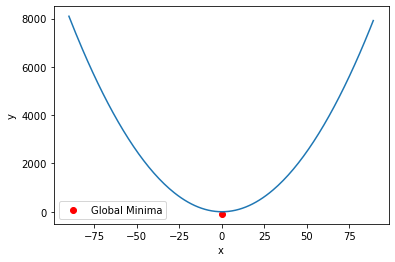

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x_cords = range(-90,90)
y_cords = [(x*x) for x in x_cords]

min_x = np.argmin(x_cords)
min_y = np.min(x_cords)

plt.plot(x_cords, y_cords)
plt.scatter(min_x,min_y,c='r',label="Global Minima")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Above our global minima is at the lowest point of the curve (where the gradient is closest to zero).

Instead of calculating the exact gradient (which is a algebraically exhausting) the parameters can be iteratively updated after every sample. This speeds up convergence to the global minima, which can be guaranteed if the learning rate approaches zero sufficiently slowly. Must approach it slowly as if we use fixed step sizes we may miss the global minima and start moving up the curve. 

As we step down the curve each step must be smaller than the last. Using the partial derivative of the slope with respect to $b$ we can define $b$ such as:
$$
b_{n}=b_{n-1} - \epsilon \frac{\delta E}{\delta b} \tag{4}
$$
where $\epsilon$ is our learning rate and the partial derivate is taken from equation 3.

Thus we now have a sound mathematical algorithm to fit our curve.

#### Predicting the Weather
Here we will investigate gradient descent by using it in a Linear Regression algorithm to predict the weather.

In the dataset each row is a day and the columns are different weather observations recorded on the corresponding day.

The use of linear regression requires a linear relationship between the predictors and the target - the target changes proportionally with a change in prediction.

In [2]:
import pandas as pd 
#import dataset into the kernel
data = pd.read_csv("../Downloads/clean_weather.csv", index_col=0)
#fill in missing data with past values
data = data.ffill()

data.head(3)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0


<AxesSubplot:xlabel='tmax', ylabel='tmax_tomorrow'>

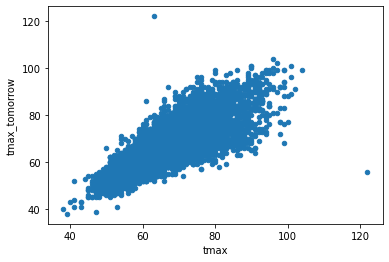

In [3]:
data.plot.scatter("tmax", "tmax_tomorrow")

Here we can see a linear relationship between <font color = red>tmax</font> and <font color = red>tmax_tomorrow</font>. Generally, one tends to increase when the other increases.

Drawing a line through the approximate centre of the scatter can be used to tell us what to multiply <font color = red>tmax</font> by to obtain a prediction for <font color = red>tmax_tomorrow</font>.

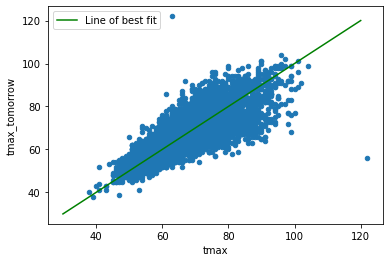

In [4]:
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([30,120],[30,120], 'green', label='Line of best fit')
plt.legend()

#### Linear Regression
Linear regression uses a simple two layer neural network to learn the correct values to multiply predictors by to reach the target. We can write an equation such that:
$$
\hat y=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+b \tag{5}
$$
where $\hat y$ is the prediction for <font color = red>tmax_tomorrow</font>, $w_{n}$ and $x_{n}$ are the weights associated with their respective predictors. (tmax, tmin and rain)
    

The algortihm learns the correct $w$ (weight) values and $b$ (bias) to get the predicted $\hat y$ values. The bias shifts the prediction line vertically (changes the y intercept). Without it, if all the predictors were zero then the prediction would also be zero.

Using <font color = green>sklearn</font> we can implement a simple linear regression model using just one predictor <font color = red>tmax</font>.

Weight: 0.82
Bias: 11.99


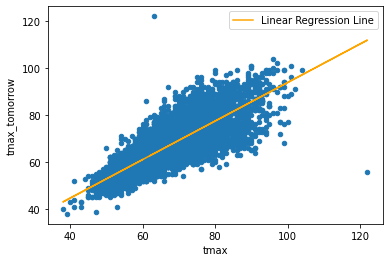

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#fit a linear regression model
lr = LinearRegression()
lr.fit(data[["tmax"]], data["tmax_tomorrow"])

#plot data points
data.plot.scatter("tmax", "tmax_tomorrow")
#plot regression line
plt.plot(data["tmax"], lr.predict(data[["tmax"]]), color="orange",label='Linear Regression Line')
plt.legend()
#print relevant coefficients
print(f"Weight: {lr.coef_[0]:.2f}")
print(f"Bias: {lr.intercept_:.2f}")

From this we can write an equation for <font color = red>tmax_tomorrow</font> as:
$$
\hat y=.82*tmax + 11.99 \tag{6}
$$
where we have substituted in the weight and bias calculated from the <font color = green>sklearn</font> model.

For example if our temperature today was 85 then <font color = red>tmax_tomorrow</font> will be: 

In [6]:
.82*85+11.99

81.69

Using __MSE__ as our cost function we can compute the loss:

Loss at weight 1: 195.72009999999986


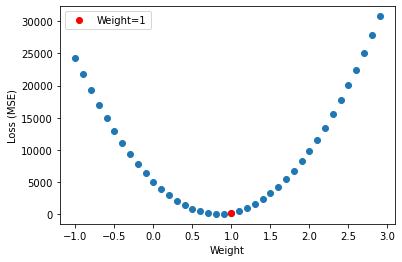

In [7]:
#function to calculate the loss
loss = lambda w,y: ((w * 85 + 11.99) - y) ** 2
#actual temperature tomorrow
y = 83
#calculate loss values for some arbitrary weights
ws = np.arange(-1,3,.1)
losses = loss(ws, y)

#plot weight and losses
plt.scatter(ws, losses)
#plot a weight of 1 and the corresponding loss
plt.plot(1, loss(1, y), 'ro', label='Weight=1')
plt.xlabel('Weight')
plt.ylabel('Loss (MSE)')
plt.legend()
#print computed loss
print(f"Loss at weight 1: {loss(1,y)}")

Above we have shown the loss at weight 1.
#### Manually Finding the Minima of this Function
Uing <font color = green>scipy.optimize</font> we can compute the minima of this _particular_ loss function. From the scatter we can see the minima is between 0.5 and 1.0. We will start from weight of -0.5 and move along the curve until the minima is found.

In [8]:
from scipy.optimize import fmin
import pylab
#redefining our function for simplicity
def loss(w):
    mse = ((w * 85 + 11.99) - 83) ** 2
    return mse
#manually imputed temp values to prevent errors with scipy.optimize

In [9]:
#finding global minima using 'downhill simplex' method
from scipy import optimize

optimize.minimize(loss,-0.5)

      fun: 4.010680676458378e-13
 hess_inv: array([[6.92041523e-05]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.83541176])

In [10]:
#extracting weight with lowest mse
minweight = optimize.minimize(loss,-0.5)
minweight = minweight.__getitem__('x')
print(minweight)

[0.83541176]


Weight with lowest MSE is: [0.83541176]


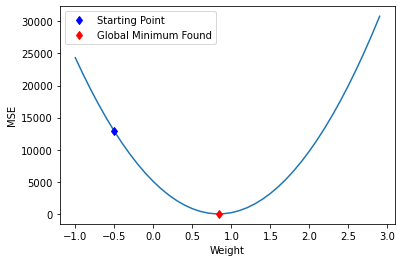

In [11]:
#using acquired x value can now plot it

#arbitrary weights
ws = np.arange(-1,3,.1)
losses = loss(ws)

plt.plot(ws,losses)
plt.plot(-0.5,loss(-0.5),'bd',label='Starting Point ')
plt.plot(minweight,loss(minweight),'rd',label='Global Minimum Found')
plt.xlabel('Weight')
plt.ylabel('MSE')
plt.legend()
print(f"Weight with lowest MSE is: {minweight}")

The above method is useful for gaining insight into optimization methods of finding a global minima. Now that we have the global minima, we want to reduce this minima even further. We do this by calculating how much each parameter contributed to the loss and then we can update these parameters to reduce this loss.
#### Parameter Updates
We need to figure out how to adjust our weights and bias ($w$ and $b$). We do this by using the partial derivative of __MSE__ against $w$ and then against $b$.

First start by calculating the gradient of __MSE__ to give us the loss function, the derivative of __MSE__:
$$
\frac{\delta MSE}{\delta y}=L=2(\hat{y}-y) \tag{7}
$$

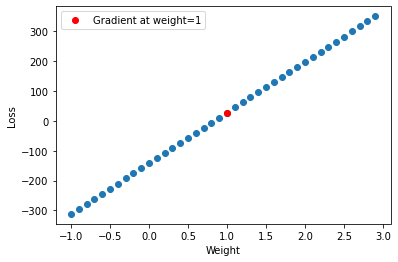

In [12]:
#function to calculate the gradient
gradient = lambda w: ((w * 85 + 11.99) - 83) * 2
#calculate gradient values for several weights
gradients = gradient(ws)

#plot the weight and gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1), 'ro',label='Gradient at weight=1')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.legend()

If the gradient is positive then our predictions are too large, if negative then too small. 

With gradient descent the goal is to get to a place where the gradient is _close to zero_. This will be the global minimum (sometimes a local minimum).

The partial derivative of $L$ wrt $b$ is:
$$
\frac{\delta L}{\delta b}=\delta L \tag{8}
$$
Partial derivative of Loss wrt to $b$ is the Loss.

By using the chain rule the partial derivative wrt $w$:
$$
\frac{\partial L}{\partial w}=\frac{\partial L}{\partial (x\times w)}\frac{\partial (x\times w)}{\partial w} \tag{9}
$$
As $\frac{\partial L}{\partial (x\times w)}$ is the same as $\delta L$ we can simplify to:
$$
\frac{\partial L}{\partial w}=\partial L\frac{\partial (x\times w)}{\partial w} \tag{10}
$$
$$
\frac{\partial L}{\partial w}=\partial L\times x \tag{11}
$$

(10-11: any change in $w$ changes the prediction proportionally to $x$)

We can now update the parameters by subtracting the computed partial derivatives from the current values. However, not the entire partial derivative.

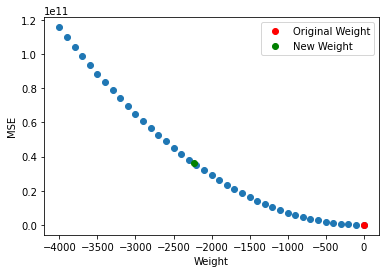

In [17]:
ws = np.arange(-4000,100,100)
losses = loss(ws)

#compute new weight
new_weight = 1-gradient(1) * 80

#plot the weight and losses
plt.scatter(ws, losses)
#original weight
plt.plot(1, loss(1), 'ro',label='Original Weight')
#plot new weight
plt.plot(new_weight, loss(new_weight), 'go',label='New Weight')
plt.xlabel('Weight')
plt.ylabel('MSE')
plt.legend()

Notice how the new weight results in a larger error than the original weight. This is because we subtracted the entire partial derivative - too large a step. This is a common problem where we overshoot the minimum.

Because we take the gradient at a single point, it assumes the gradient stays constant, instead the gradient changes quite a lot as shown in the Loss graph. To adjust for this we use a Learning Rate.
#### Learning Rate
Instead of adjusting the weights and biases directly by the partial derivative, we multiply by the learning rate. This enables us to take a smaller step, and stay in a region where the gradient doesn't change too much. Here the learning rate is set to $5\times 10^{-5}$:

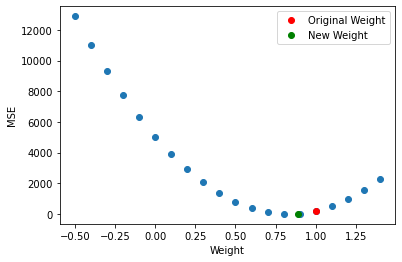

In [20]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1), 'ro',label='Original Weight')
# New weight with learning rate
lr = 5e-5
new_weight = 1 - lr * gradient(1) * 80
plt.plot(new_weight, loss(new_weight), 'go',label='New Weight')
plt.xlabel('Weight')
plt.ylabel('MSE')
plt.legend()

This is an improvement but we still aren't at the global minimum. To arriver at the global minimum we repeate this multiple times to descend on the global minimum as follows:
- predict $y$ using the current parameters
- Measure the gradient
- Update $w$ and $b$ using the partial derivatives

This repetition is <font color=blue>Gradient Descent</font>. In Linear regression we're looking at hundreds or thousands of rows, not just a single data point. In this case, we loop through the entire data set, and do gradient descent on each row. We then repeat this until the gradient averaged over the entire training set is close to 0.

### Implementation
Now applying this to the whole dataset. First load the data and split into 3 sets:
- Training set
- Validation set, to measure the error
- Test set, to evaluate the model after it has been fit

Separate sets help to prevent overfitting data where it would perform well on its own set but doesn't generalise well to other datasets.

In [21]:
#define our predictors and target
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split_data]

A linear regression algorithm needs 4 elements for gradient descent:
1. A way to initialize our parameters (weights and biases)
2. A forward pass that computes predictions using the parameters
3. A loss function that measures the error of our predictions
4. A backward pass that updates our parameters to reduce the loss

We randomly initialize the weight paramaters to help the algorithm descend to a global minimum.

Usually initialize bias to be $1$ or $0$.

We'll shrink the initial parameter values so we don't end up with predictions that are too large (this can cause gradient descent to take steps that are too large).

1. Below we will initialize one $w$ value for each predictor and one bias for each target variable (in this case we only have one target variable).

In [22]:
import math

def init_params(predictors):
    #initialize model parameters
    #k is a scaling factor that we use to reduce the weights and biases initially
    k = math.sqrt(1 / predictors)
    #we set a random seed so if we re-run this code, we get the same results
    np.random.seed(0)
    weights = np.random.rand(predictors, 1) * 2 * k - k
    biases = np.ones((1, 1)) * 2 * k - k
    return  [weights, biases]

2. In the forward pass, generate predictions by:
$$
\hat{y}=wx+b \tag{12}
$$
where $\hat{y}$ is the prediction and $x$ is the input.

In [23]:
def forward(params, x):
    weights, biases = params
    #multiply x values by w values with matrix multiplication, then add b
    prediction = x @ weights + biases
    return prediction

3. Calculate error through error function (MSE) and loss function (gradient of MSE):

In [24]:
def mse(actual, predicted):
    #calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    #the derivative of mean squared error
    return predicted - actual

4. In the backward paass, update parameters and make predictions for whole training set. Then average gradient across whole set to compute the updates. (ensures a single training example doesn't skew gradient too far in one way or another):

In [25]:
def backward(params, x, lr, grad):
    #multiply the gradient by the x values
    #divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

Finally we can write a loop that does all of this over several epochs, more epochs improve accuracy (up to a point):

In [26]:
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

#store weights and gradients so we can visualize
#(not actually necessary for algorithm)
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    #store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    #display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

Epoch 0 validation loss: 297.2754077070607
Epoch 10000 validation loss: 22.647249675483113
Epoch 20000 validation loss: 22.613777406314746
Epoch 30000 validation loss: 22.581085439005857
Epoch 40000 validation loss: 22.5491541585802


In [28]:
#display final params to see how regression worked
params
#displays weight for each predictor and final bias

[array([[ 0.79210427],
        [ 0.2450347 ],
        [-0.06038591]]),
 array([[1.12700385]])]

#### Visualizing Gradient Descent
As we are limited to three dimensions we can look at $w_{1}$ and $w_{2}$ (<font color=red>tmax</font> and <font color=red>tmin</font>) against the gradient. 

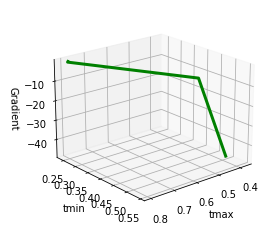

In [32]:
import matplotlib.pyplot as plt

#create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

#plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3, zorder=10)
ax.set_xlabel('tmax')
ax.set_ylabel('tmin')
ax.set_zlabel('Gradient')
plt.show()

This shows we started in area of negative gradient where predictions were lower than the target. This is because the weights were randomly intialized. Both paramaters then move towards the global minimum and plateau after they can longer get any lower.

Evaluating the algorithm on the test set to measure error:

In [33]:
predictions = forward(params, test_x)
mse(test_y, predictions)

23.335214564774653

#### References

The Computational Brain By Patricia S. Churchland and Terrence J. Sejnowski

https://www.youtube.com/watch?v=-cs5D91eBLE&t=258s
